In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Import the requests library
import requests
# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

53.53510934543476 31.205441351975054
19.791046796441563 30.84333184365269
-47.31415893707895 -18.352851779766695
87.16500623087771 159.97235174998633
-24.88647962601692 19.907614527542734
-67.20535923240509 -166.55125822030902
-74.87187747049063 -160.6764880956269
85.19577843431605 108.73192534085388
-25.522581656482217 101.99618909696704
-48.48811022709254 120.9567732084393
-51.02842821780146 -34.819490023078316
-71.53448340538125 103.75417267393067
-11.906851836599202 -88.06890320704753
-12.46059073897868 -111.11223616748775
24.861845313698197 49.70506606924641
25.59900115641493 28.514605748068448
-31.755981602992307 24.349819395217366
76.19536024194207 148.79671396786358
-55.391735711371275 -74.25509086793983
59.571500956549016 122.1288212361269
15.12672294261688 -10.816408328588324
-48.093717015997676 5.25425808291493
83.95518716780603 157.61155793914986
7.190026951230507 2.6826913172833713
-83.83112816595823 6.2628406509894035
-63.39325315120741 147.19717707380244
12.7806254077086

37.16691917249247 49.979840315200306
46.53232305779596 0.6446222697376527
-48.95437501483741 2.1041363944264333
21.820986600475095 8.456013565880454
75.65842933168688 18.39694046006008


In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [164]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [165]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 24 of Set 37 | albany
Processing Record 25 of Set 37 | gat
Processing Record 26 of Set 37 | banamba
Processing Record 27 of Set 37 | thompson
Processing Record 28 of Set 37 | phan rang
City not found. Skipping...
Processing Record 29 of Set 37 | taolanaro
City not found. Skipping...
Processing Record 30 of Set 37 | punta arenas
Processing Record 31 of Set 37 | attawapiskat
City not found. Skipping...
Processing Record 32 of Set 37 | twentynine palms
Processing Record 33 of Set 37 | souillac
Processing Record 34 of Set 37 | vaini
Processing Record 35 of Set 37 | wilmington
Processing Record 36 of Set 37 | moundsville
Processing Record 37 of Set 37 | illoqqortoormiut
City not found. Skipping...
Processing Record 38 of Set 37 | barrow
Processing Record 39 of Set 37 | bengkulu
Processing Record 40 of Set 37 | chuy
Processing Record 41 of Set 37 | amderma
City not found. Skipping...
Processing Record 42 of Set 37 | sava
Processing Record 43 of Set 37 | leningradskiy
Proces

Processing Record 35 of Set 40 | killybegs
Processing Record 36 of Set 40 | rio grande
Processing Record 37 of Set 40 | verkh-usugli
Processing Record 38 of Set 40 | sioux lookout
Processing Record 39 of Set 40 | mukhen
Processing Record 40 of Set 40 | mehamn
Processing Record 41 of Set 40 | port macquarie
Processing Record 42 of Set 40 | murray
Processing Record 43 of Set 40 | vallenar
Processing Record 44 of Set 40 | terra santa
Processing Record 45 of Set 40 | nome
Processing Record 46 of Set 40 | deputatskiy
Processing Record 47 of Set 40 | kalmunai
Processing Record 48 of Set 40 | podor
Processing Record 49 of Set 40 | bathsheba
Processing Record 50 of Set 40 | port blair
Processing Record 1 of Set 41 | half moon bay
Processing Record 2 of Set 41 | carnarvon
Processing Record 3 of Set 41 | lebu
Processing Record 4 of Set 41 | nhulunbuy
Processing Record 5 of Set 41 | mar del plata
Processing Record 6 of Set 41 | victoria
Processing Record 7 of Set 41 | kitale
Processing Record 8 o

Processing Record 19 of Set 44 | zelenoborskiy
Processing Record 20 of Set 44 | gurgan
City not found. Skipping...
Processing Record 21 of Set 44 | svetlaya
Processing Record 22 of Set 44 | dullewala
Processing Record 23 of Set 44 | marawi
Processing Record 24 of Set 44 | markova
Processing Record 25 of Set 44 | corpus christi
Processing Record 26 of Set 44 | windhoek
Processing Record 27 of Set 44 | chillicothe
Processing Record 28 of Set 44 | segezha
Processing Record 29 of Set 44 | minna
Processing Record 30 of Set 44 | polyanka
Processing Record 31 of Set 44 | odienne
Processing Record 32 of Set 44 | zhigansk
Processing Record 33 of Set 44 | sunland park
Processing Record 34 of Set 44 | berlevag
Processing Record 35 of Set 44 | chokurdakh
Processing Record 36 of Set 44 | kahului
Processing Record 37 of Set 44 | kendari
Processing Record 38 of Set 44 | palabuhanratu
City not found. Skipping...
Processing Record 39 of Set 44 | mnogovershinnyy
Processing Record 40 of Set 44 | angoche


Processing Record 8 of Set 48 | isiro
Processing Record 9 of Set 48 | tilichiki
Processing Record 10 of Set 48 | fairlie
Processing Record 11 of Set 48 | vicuna
Processing Record 12 of Set 48 | victor harbor
Processing Record 13 of Set 48 | ulaangom
Processing Record 14 of Set 48 | zhangjiakou
Processing Record 15 of Set 48 | hambantota
Processing Record 16 of Set 48 | bonoua
Processing Record 17 of Set 48 | erdaojiang
Processing Record 18 of Set 48 | krasnoarmeysk
Processing Record 19 of Set 48 | dubna
Processing Record 20 of Set 48 | sorland
Processing Record 21 of Set 48 | santa fe
Processing Record 22 of Set 48 | pangoa
Processing Record 23 of Set 48 | serowe
Processing Record 24 of Set 48 | saint-augustin
Processing Record 25 of Set 48 | porto novo
Processing Record 26 of Set 48 | vila franca do campo
Processing Record 27 of Set 48 | severo-yeniseyskiy
Processing Record 28 of Set 48 | kabwe
Processing Record 29 of Set 48 | eydhafushi
Processing Record 30 of Set 48 | bulawayo
Proce

In [166]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.8961,-24.4956,72.90,79,52,13.22,CV,2022-05-21 18:36:19
1,Bundaberg,-24.8500,152.3500,64.22,98,100,3.00,AU,2022-05-21 18:32:15
2,Puerto Ayora,-0.7393,-90.3518,76.96,91,71,10.00,EC,2022-05-21 18:27:28
3,Cape Town,-33.9258,18.4232,59.11,79,0,2.30,ZA,2022-05-21 18:27:11
4,Ushuaia,-54.8000,-68.3000,42.46,65,40,11.50,AR,2022-05-21 18:27:14
5,Ussel,45.5500,2.3167,71.15,70,77,0.43,FR,2022-05-21 18:36:20
6,Rikitea,-23.1203,-134.9692,75.18,74,8,6.91,PF,2022-05-21 18:27:16
7,Yuzhno-Kurilsk,44.0306,145.8556,48.54,99,100,8.59,RU,2022-05-21 18:36:21
8,Sena Madureira,-9.0656,-68.6569,89.20,43,37,2.59,BR,2022-05-21 18:36:22
9,Camacha,33.0833,-16.3333,65.62,68,20,16.11,PT,2022-05-21 18:34:35


In [167]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [168]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [169]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

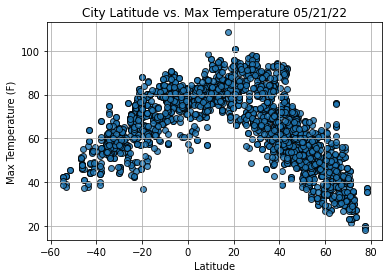

In [170]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

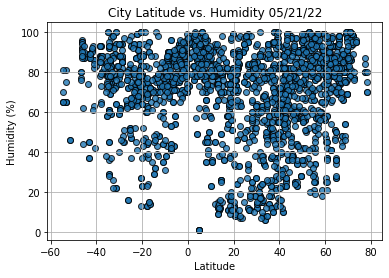

In [171]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

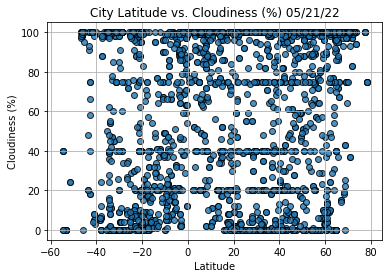

In [172]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

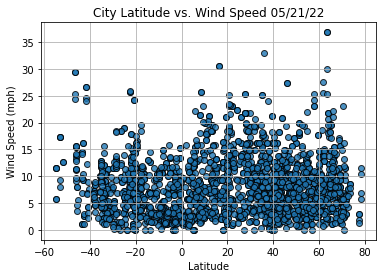

In [173]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [174]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [175]:
index13 = city_data_df.loc[13]
index13

City                    Sept-Iles
Country                        CA
Date          2022-05-21 18:36:03
Lat                       50.2001
Lng                      -66.3821
Max Temp                    47.05
Humidity                       90
Cloudiness                    100
Wind Speed                   9.22
Name: 13, dtype: object

In [176]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2022-05-21 18:36:19,14.8961,-24.4956,72.90,79,52,13.22
5,Ussel,FR,2022-05-21 18:36:20,45.5500,2.3167,71.15,70,77,0.43
7,Yuzhno-Kurilsk,RU,2022-05-21 18:36:21,44.0306,145.8556,48.54,99,100,8.59
9,Camacha,PT,2022-05-21 18:34:35,33.0833,-16.3333,65.62,68,20,16.11
13,Sept-Iles,CA,2022-05-21 18:36:03,50.2001,-66.3821,47.05,90,100,9.22


In [177]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

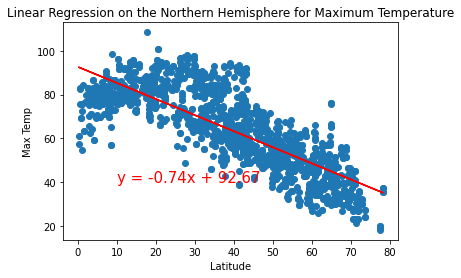

In [178]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

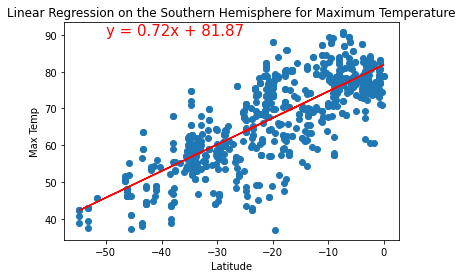

In [179]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

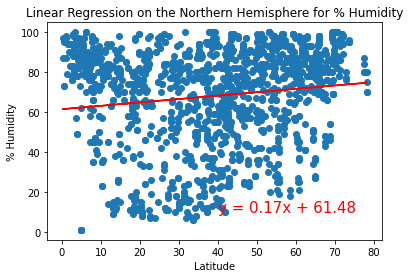

In [180]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

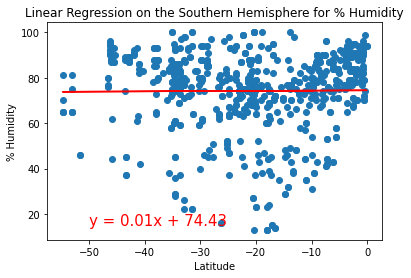

In [181]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

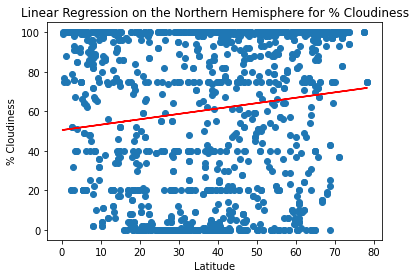

In [182]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

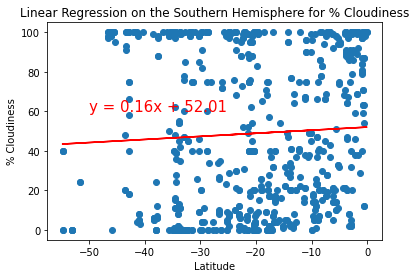

In [183]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

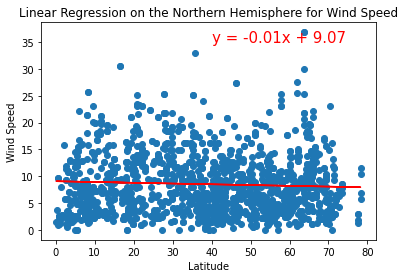

In [184]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

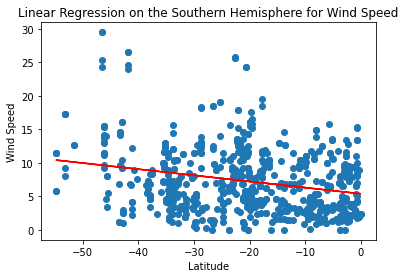

In [185]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))